In [1]:
import os
from utils import config
import numpy as np
import matplotlib.pyplot as plt

In [2]:
date = "2019-03-17 08:11:24"
average_over = 100
filepath = os.path.abspath(os.path.join(config().sim.output.path, date))
n_agents = config().learning.n_processes

print(filepath)

/run/media/bdvllrs/Data/Documents/Supelec/OMA/RL/Projet/videos/2019-03-17 08:11:24


In [3]:
returns = []
losses = []
to_numpy = lambda x: x.item()
for idx in range(1, n_agents + 1):
    losses.append(np.load(filepath + f"/metrics_agent_{idx}_losses.npy"))
    returns.append(list(map(to_numpy, np.load(filepath + f"/metrics_agent_{idx}_returns.npy"))))
    
losses = losses[0]

In [4]:
def moving_average(data, N=10):
    cumsum, moving_aves = [0], []
    std = []

    for i, x in enumerate(returns[0], 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
            std.append(np.std(data[i-N:i]))
    return np.array(moving_aves), np.array(std)

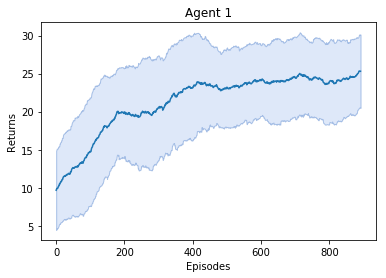

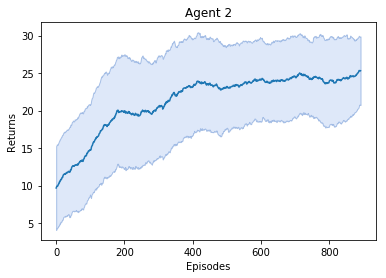

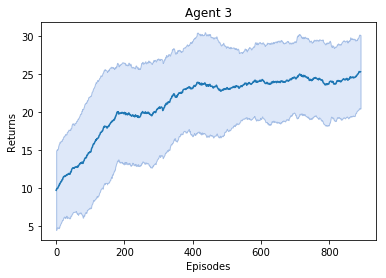

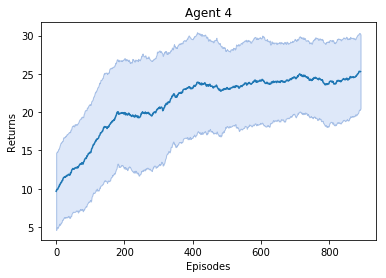

In [5]:
for idx in range(n_agents):
    mean, std = moving_average(returns[idx], average_over)
    t = range(0, len(mean))
    plt.figure()
    plt.plot(t, mean)
    plt.fill_between(t, mean-std, mean+std, alpha=0.5, edgecolor='#608cd1', facecolor='#bed3f4')
    plt.xlabel("Episodes")
    plt.ylabel("Returns")
    plt.title(f"Agent {idx + 1}")
    plt.savefig(filepath + f"/returns_agent_{idx+1}.eps", type="eps", dpi=1000)
    plt.show()

In [6]:
total_loss = []
ac_loss = []
inverse_loss = []
forward_loss = []

for l in losses:
    total_loss.append(l[0])
    ac_loss.append(l[1])
    inverse_loss.append(l[2])
    forward_loss.append(l[3])

IndexError: invalid index to scalar variable.

/usr/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


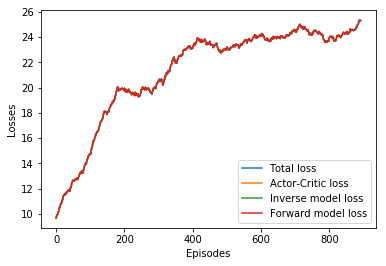

In [7]:
total_loss, _ = moving_average(total_loss, average_over)
ac_loss, _ = moving_average(ac_loss, average_over)
inverse_loss, _ = moving_average(inverse_loss, average_over)
forward_loss, _ = moving_average(forward_loss, average_over)
t = range(0, len(total_loss))
plt.figure()
plt.plot(t, total_loss, label="Total loss")
plt.plot(t, ac_loss, label="Actor-Critic loss")
plt.plot(t, inverse_loss, label="Inverse model loss")
plt.plot(t, forward_loss, label="Forward model loss")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Losses")
plt.savefig(filepath + "/losses.eps", type="eps", dpi=1000)
plt.show()